In [1]:

import threading
import time
import os

def hello(s):
    print('Function start! ', s, 'pid:', os.getpid(), 'thread id:', threading.get_ident())
    time.sleep(1)

t1 = threading.Thread(target=hello, args=['Hello t1'])
t2 = threading.Thread(target=hello, args=['Hello t2'])
t1.start()
t2.start()
t1.join()
t2.join()


Function start!  Hello t1 pid: 526833 thread id: 140023953340160
Function start!  Hello t2 pid: 526833 thread id: 140023944947456


In [2]:

import multiprocessing
import time
import os

def hello(s):
    print('Function start! ', s, 'pid:', os.getpid(), 'thread id:', threading.get_ident())
    time.sleep(1)

p1 = multiprocessing.Process(target=hello, args=['Hello p1'])
p2 = multiprocessing.Process(target=hello, args=['Hello p2'])
p1.start()
p2.start()
p1.join()
p2.join()


Function start!  Hello p2 pid: 527086 thread id: 140024441164160
Function start!  Hello p1 pid: 527084 thread id: 140024441164160


In [36]:
import threading
import os
import time
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

def identify_self():
    print(f"Thread={threading.get_ident()}, Process={os.getpid()}", end='\n')


print("MP:")
with ProcessPoolExecutor(max_workers=4) as executor:
    for i in range(4):
        executor.submit(identify_self)

print("MT:")
with ThreadPoolExecutor(max_workers=4) as executor:
    for i in range(4):
        executor.submit(identify_self)

MP:
Thread=140151806050688, Process=674648Thread=140151806050688, Process=674651Thread=140151806050688, Process=674649Thread=140151806050688, Process=674650



MT:
Thread=140150854104832, Process=557577
Thread=140150352901888, Process=557577
Thread=140150352901888, Process=557577
Thread=140150352901888, Process=557577


In [3]:
from threading import Thread

class Counter:
    def __init__(self):
        self.count = 0

    def increment(self, offset):
        self.count += offset

def worker(sensor_index, how_many, counter):
    for _ in range(how_many):
        counter.increment(1)

how_many = 10**5
counter = Counter()

threads = []
for i in range(5):
    thread = Thread(target=worker,
                    args=(i, how_many, counter))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

expected = how_many * 5
found = counter.count
print(f'카운터 값은 {expected}여야 하는데, 실제로는 {found} 입니다')

카운터 값은 500000여야 하는데, 실제로는 500000 입니다


In [4]:
from threading import Thread
from threading import Lock

class LockingCounter:
    def __init__(self):
        self.lock = Lock()
        self.count = 0

    def increment(self, offset):
        with self.lock:
            self.count += offset

def worker(sensor_index, how_many, counter):
    for _ in range(how_many):
        counter.increment(1)


how_many = 10**5
counter = LockingCounter()

threads = []
for i in range(5):
    thread = Thread(target=worker,
                    args=(i, how_many, counter))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

expected = how_many * 5
found = counter.count
print(f'카운터 값은 {expected}여야 하는데, 실제로는 {found} 입니다')



카운터 값은 500000여야 하는데, 실제로는 500000 입니다


In [5]:

from multiprocessing import Process , Value


class Counter:
    def __init__(self):
        self.count = Value('i', 0)

    def increment(self, offset):
        self.count.value += offset
        
how_many = 10**5
counter = Counter()


def worker(sensor_index, how_many, counter):
    for _ in range(how_many):
        # 센서를 읽는다
        counter.increment(1)


processes = []

for i in range(5):
    process = Process(target=worker,
                    args=(i, how_many, counter))
    processes.append(process)
    process.start()

for process in processes:
    process.join()

expected = how_many * 5
found = counter.count.value

print(f'카운터 값은 {expected}여야 하는데, 실제로는 {found} 입니다')

카운터 값은 500000여야 하는데, 실제로는 158365 입니다


In [6]:

from multiprocessing import Process , Value
from multiprocessing import Lock


class Counter:
    def __init__(self):
        self.count = Value('i', 0)

    def increment(self, offset):
        self.count.value += offset
        
how_many = 10**5
counter = Counter()


def worker(sensor_index, how_many, counter, lock):
    for _ in range(how_many):
        lock.acquire()
        counter.increment(1)
        lock.release()

lock = Lock()
processes = []

for i in range(5):
    process = Process(target=worker,
                    args=(i, how_many, counter, lock))
    processes.append(process)
    process.start()

for process in processes:
    process.join()

expected = how_many * 5
found = counter.count.value

print(f'카운터 값은 {expected}여야 하는데, 실제로는 {found} 입니다')

카운터 값은 500000여야 하는데, 실제로는 500000 입니다


In [7]:
import os
import time
import threading
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

import matplotlib.pyplot as plt
import numpy as np

printlock = threading.Lock()

def multithreading(func, args, workers):
    print("multithreading started workers:", workers)
    with ThreadPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)


def multiprocessing(func, args, workers):
    print("multiprocessing started workers:", workers)
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)


def live_tracker(x):
    with printlock:
        print('Functions start! ', x, "pid:", os.getpid(), "thread id:", threading.get_ident())
    reference = time.time()
    l = []
    for i in range(10**6):
        l.append(time.time() - reference)
    return l


def visualize_live_runtimes(results, title):
    for i, exp in enumerate(results):
        plt.scatter(exp, np.ones(len(exp)) * i, alpha=0.8, c='red', edgecolors='none', s=1)

    plt.grid(axis='x')
    plt.ylabel("Tasks")
    ytks = range(len(results))
    plt.yticks(ytks, ['job {}'.format(exp) for exp in ytks])
    plt.xlabel("Seconds")
    plt.title(title)




multithreading started workers: 4
Functions start!  0 pid: 526833 thread id: 140023944947456
Functions start!  1 pid: 526833 thread id: 140023450040064
Functions start!  2 pid: 526833 thread id: 140023441647360
Functions start!  3 pid: 526833 thread id: 140023936554752
multiprocessing started workers: 4
Functions start!  Functions start! 0Functions start! Functions start!     2pid:13    pid:pid:527668pid:   527670 527669thread id: 527671  thread id: thread id:140024441164160 thread id: 
140024441164160 140024441164160
140024441164160



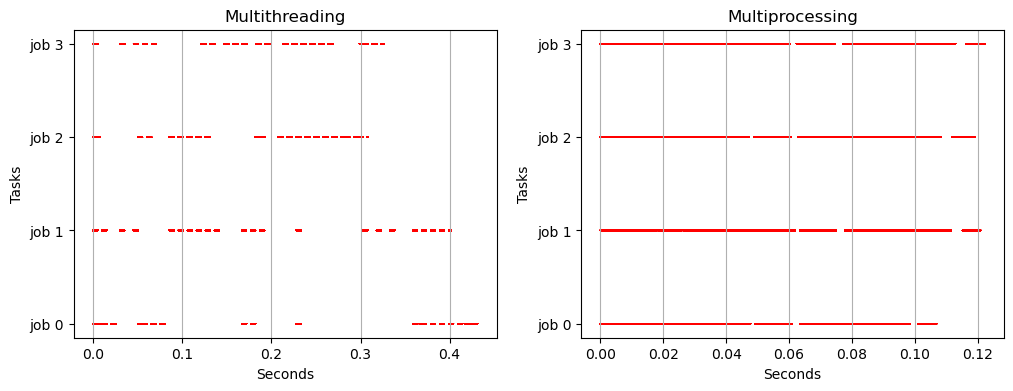

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
visualize_live_runtimes(multithreading(live_tracker, range(4), 4), "Multithreading")
plt.subplot(1, 2, 2)
visualize_live_runtimes(multiprocessing(live_tracker, range(4), 4), "Multiprocessing")
plt.show()

## references
---
- https://www.youtube.com/watch?v=dzfij2nZbRw
- https://github.com/gilbutITbook/080235/blob/master/Chapter7/Better%20way54_1.py
- https://medium.com/swlh/protect-your-shared-resource-using-multiprocessing-locks-in-python-21fc90ad5af1